In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.io import fits

data = pd.read_csv('resultados.csv')
print(data)

     Unnamed: 0                  y                  x  image      flux_e  \
0             0  1028.92150873 pix  1019.98557515 pix      1  529.780365   
1             1   1029.7900709 pix  1019.17889753 pix      2  527.928082   
2             2  1029.16157592 pix   1019.1650955 pix      3  532.081717   
3             3  1029.08154937 pix  1019.10360908 pix      4  537.969364   
4             4  1029.00314538 pix  1019.17710692 pix      5  546.933883   
5             5  1029.08888358 pix  1017.22160758 pix      6  548.990383   
6             6   1028.9451856 pix  1017.82157863 pix      7  554.898167   
7             7  1028.29034862 pix   1017.8238528 pix      8  557.898308   
8             8  1028.92301083 pix  1017.00588167 pix      9  559.164555   
9             9   1028.2693758 pix  1017.14787888 pix     10  549.894603   
10           10  1028.96463443 pix  1016.86500593 pix     11  540.408383   
11           11  1028.85623237 pix  1016.86699783 pix     12  525.401847   
12          

In [84]:
path =r"C:/Users/Alexander/Downloads/Practicas/SCIENCE/2022-05-13/"
dates = pd.DataFrame(columns={'image','date','airmass'}, index=None)
for j in data['image']:
    ma = '0'+str(j)
    
    if j <100 :
        ma = '00'+str(j)
    if j <10 :
        ma = '000'+str(j)
    hdu = fits.open(path+'TRES1b-'+ma+'_gSDSS.fit')[0]
    header = hdu.header
    dates = dates.append({'image':ma,'date':header['JD'],'airmass':header['AIRMASS']}, ignore_index=True)
print(dates)

             date image   airmass
0    2.459713e+06  0001  1.907577
1    2.459713e+06  0002  1.901282
2    2.459713e+06  0003  1.894876
3    2.459713e+06  0004  1.888511
4    2.459713e+06  0005  1.882207
5    2.459713e+06  0006  1.875943
6    2.459713e+06  0007  1.869724
7    2.459713e+06  0008  1.863701
8    2.459713e+06  0009  1.857572
9    2.459713e+06  0010  1.851488
10   2.459713e+06  0011  1.845448
11   2.459713e+06  0012  1.839451
12   2.459713e+06  0013  1.833643
13   2.459713e+06  0014  1.827732
14   2.459713e+06  0015  1.821864
15   2.459713e+06  0016  1.816038
16   2.459713e+06  0017  1.810254
17   2.459713e+06  0018  1.804511
18   2.459713e+06  0019  1.798948
19   2.459713e+06  0020  1.793285
20   2.459713e+06  0021  1.787664
21   2.459713e+06  0022  1.782082
22   2.459713e+06  0023  1.776539
23   2.459713e+06  0024  1.771170
24   2.459713e+06  0025  1.765705
25   2.459713e+06  0026  1.760278
26   2.459713e+06  0027  1.754890
27   2.459713e+06  0028  1.749539
28   2.459713e

In [85]:
import numpy as np

result = pd.concat([data, dates], axis=1, join="inner")
result['final_flux'] = (result['flux']-1227144.84705*result['airmass'])*1.85

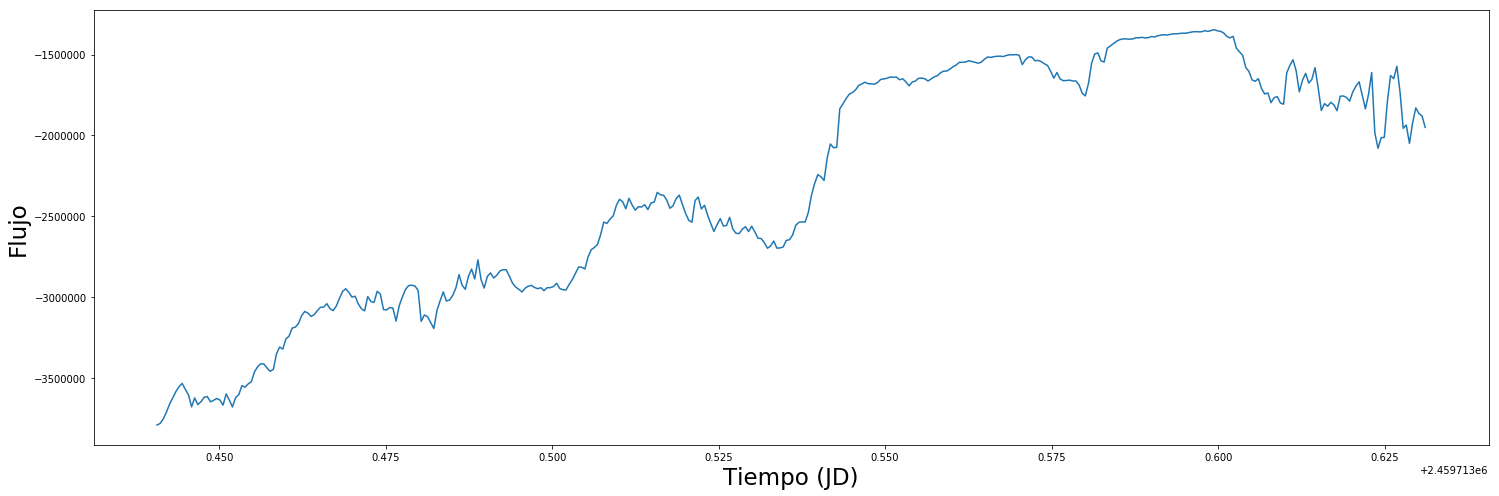

In [86]:
plt.figure(figsize=(25,8))
plt.plot(result['date'],result['final_flux'])
    
plt.ylabel("Flujo", fontsize=23)
plt.xlabel("Tiempo (JD)", fontsize=23)
plt.show()

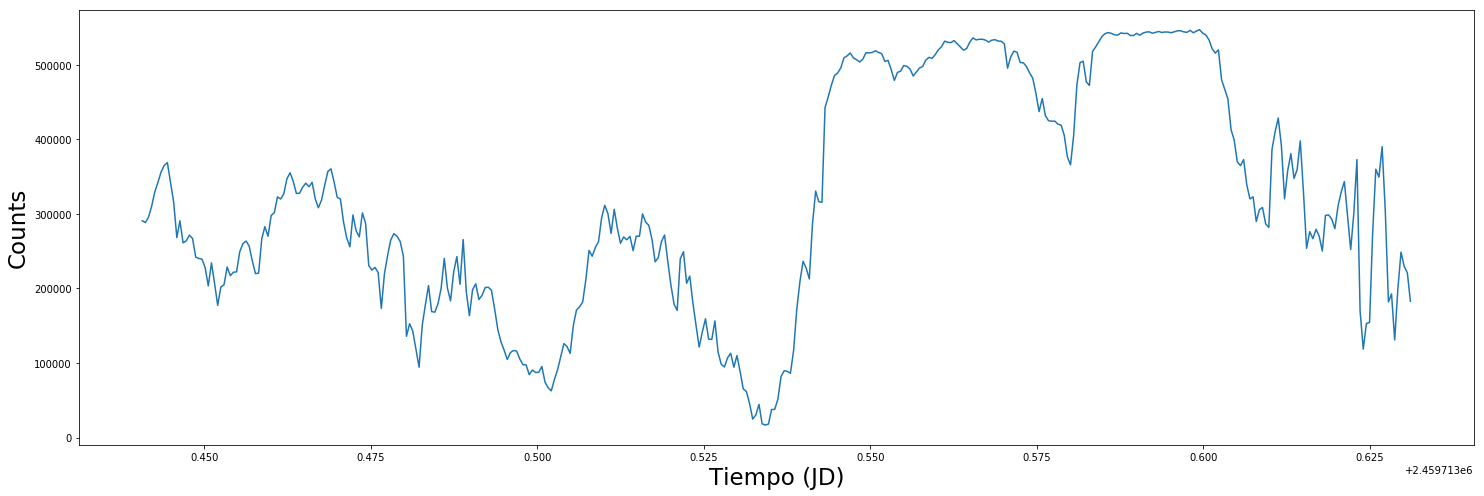

In [87]:
plt.figure(figsize=(25,8))
plt.plot(result['date'],result['flux'])
    
plt.ylabel("Counts", fontsize=23)
plt.xlabel("Tiempo (JD)", fontsize=23)
plt.show()

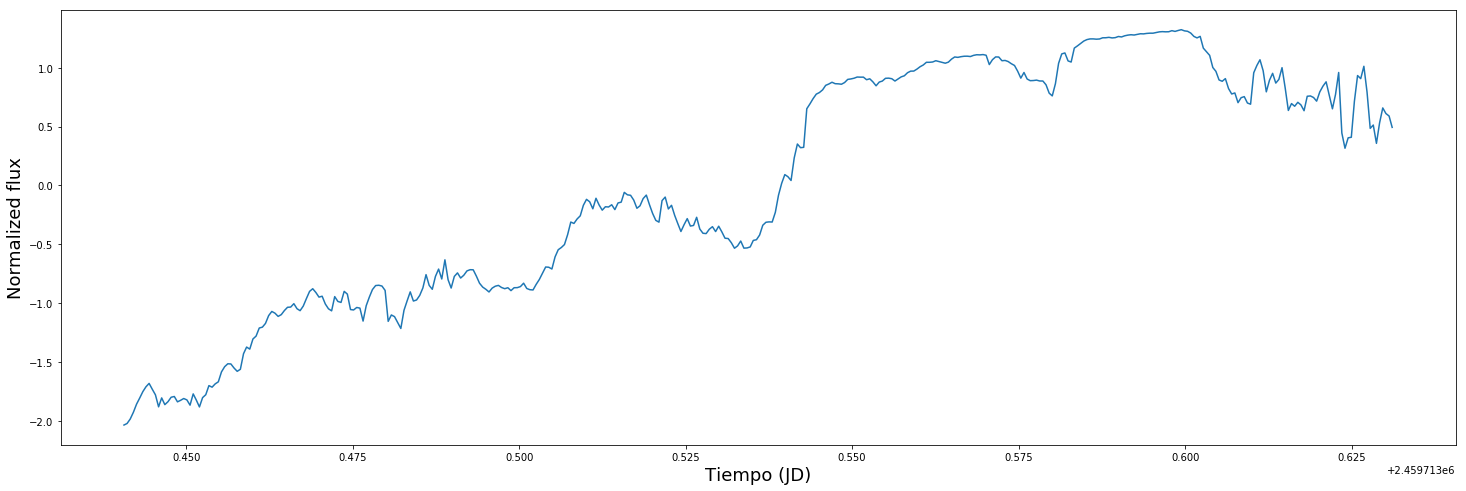

In [90]:
whole_norm = result
whole_norm['norm_flux'] = (whole_norm['final_flux'] - whole_norm['final_flux'].mean())/whole_norm['final_flux'].std()
plt.figure(figsize=(25,8))
plt.plot(whole_norm['date'],whole_norm['norm_flux'])
    
plt.ylabel("Normalized flux", fontsize=18)
plt.xlabel("Tiempo (JD)", fontsize=18)
plt.show()

C:\Users\Alexander\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


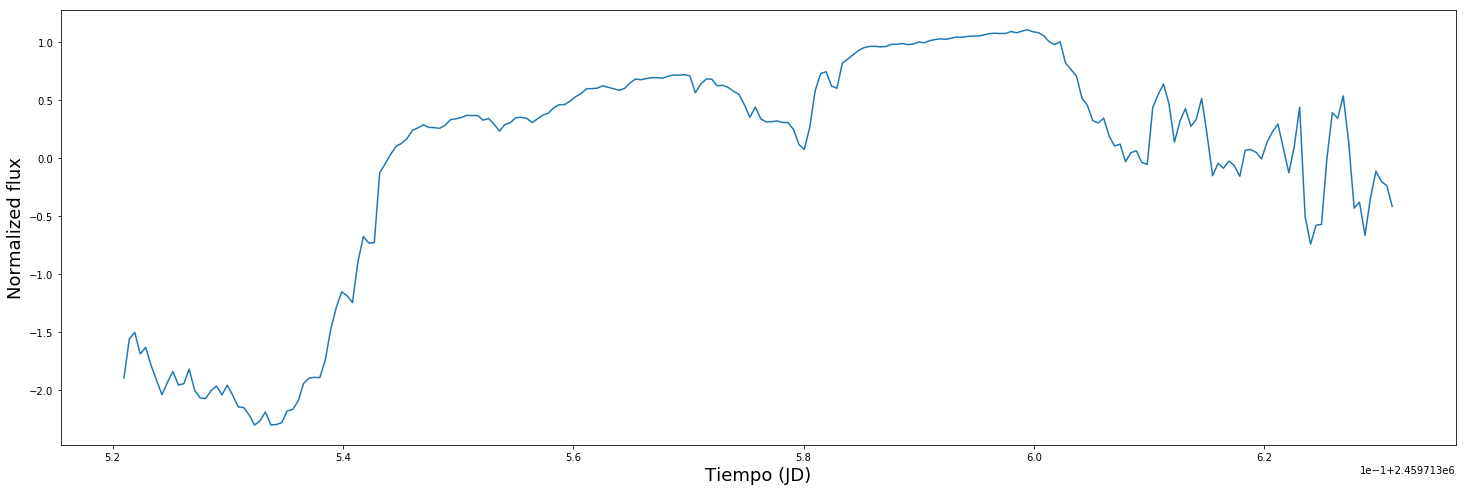

In [124]:
transit = result[170:404]
transit['norm_flux'] = (transit['final_flux'] - transit['final_flux'].mean())/transit['final_flux'].std()
plt.figure(figsize=(25,8))
plt.ticklabel_format(axis="x", style="sci", scilimits=(4,4))

plt.plot(transit['date'],transit['norm_flux'])
    
plt.ylabel("Normalized flux", fontsize=18)
plt.xlabel("Tiempo (JD)", fontsize=18)

plt.show()

-1755690.1937956437
-1657992.7644767272
0.05564616676915162


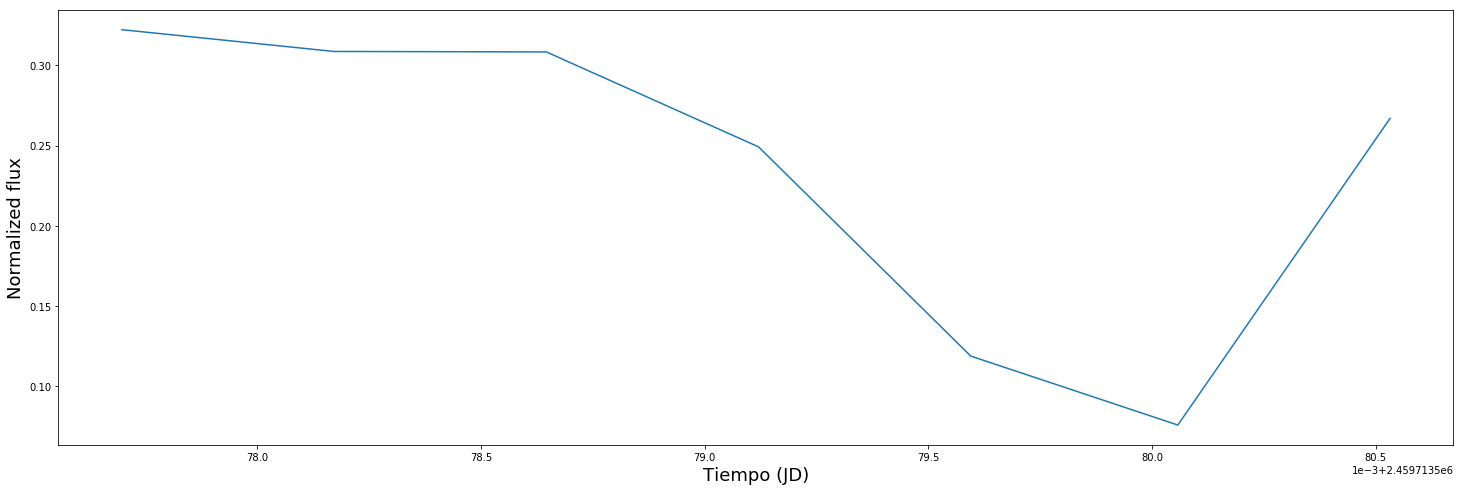

In [129]:
transit = result[290:297]

print(transit['final_flux'].min() )
print(transit['final_flux'].max() )
print((transit['final_flux'].min()-transit['final_flux'].max() )/(transit['final_flux'].min() ))

plt.figure(figsize=(25,8))
plt.ticklabel_format(axis="x", style="sci", scilimits=(4,4))

plt.plot(transit['date'],transit['norm_flux'])
    
plt.ylabel("Normalized flux", fontsize=18)
plt.xlabel("Tiempo (JD)", fontsize=18)

plt.show()